MacBook runtime: Wall time: 5min 31s

In [1]:
import numpy as np

sech_fwhm_conv = 1./2.6339157938
t_width = 1.0*sech_fwhm_conv # [τ]

print('t_width', t_width)

n = 2.0 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl', ampl)

t_width 0.3796628587572578
ampl 0.8384014365421667


In [2]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 0.8384014365421667,
        "rabi_freq_t_args": {
          "ampl_1": 1.0,
          "centre_1": 0.0,
          "width_1": 0.3796628587572578
        },
        "rabi_freq_t_func": "sech_1"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 1200,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "num_density_z_func": "square_1",
  "num_density_z_args": {
    "on_1": 0.0,
    "off_1": 1.0,
    "ampl_1": 1.0
  },
  "interaction_strengths": [
    10.0
  ],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-sech-2pi"
}
"""

In [3]:
from maxwellbloch import mb_solve

In [4]:
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

np.trapz(mb_solve_00.Omegas_zt[0,0,:], mb_solve_00.tlist)/np.pi

(1.9934364138920346+0j)

In [5]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(step='ab', recalc=False)

Loaded tuple object.
CPU times: user 6.89 ms, sys: 27.2 ms, total: 34.1 ms
Wall time: 91.9 ms


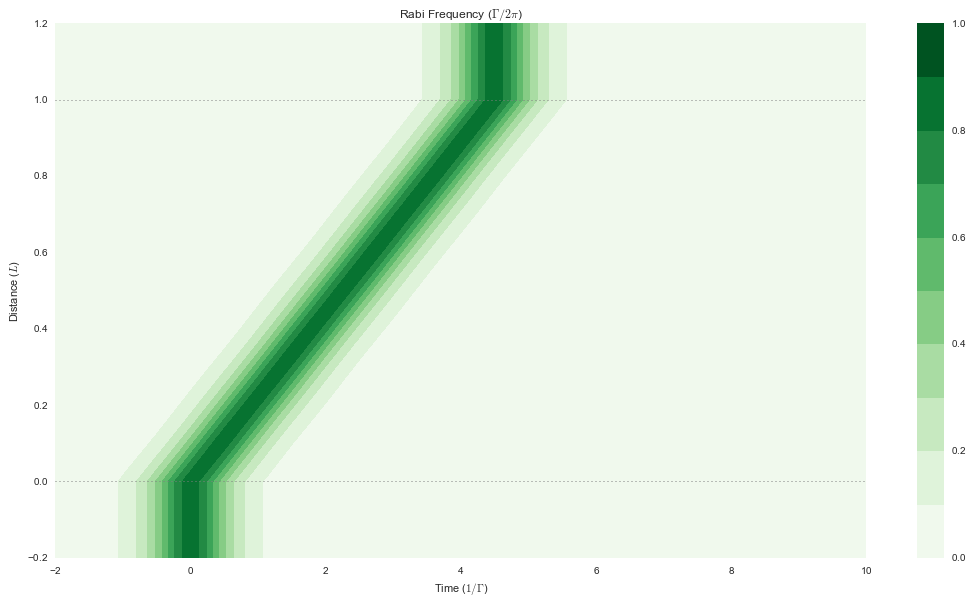

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig, ax = plt.subplots(figsize=(16, 9))
cmap_range = np.linspace(0.0, 1.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);
plt.savefig('images/mb-solve-two-sech-2pi.png')

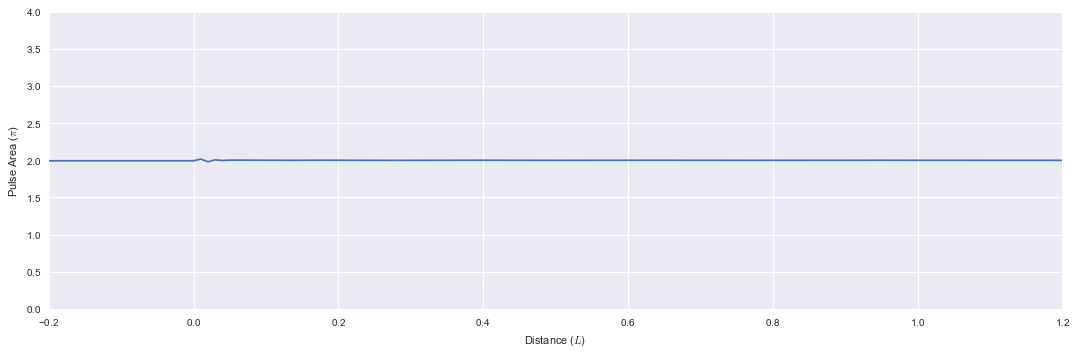

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi)
ax.set_ylim([0.0, 4.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)')